In [1]:
import os
import pandas as pd

# OHA

In [24]:
import json
import re

def get_rps_from_output(exp_dir: str):
    with open (os.path.join(exp_dir, 'out.txt'), 'r') as f:
        content = f.read()

    # Use regular expressions to find the RPS value
    match = re.search(r'Requests/sec:\s+([\d.]+)', content)
    if match:
        rps_value = float(match.group(1))
        # print(f'Requests/sec: {rps_value}')
    else:
        # print('Requests/sec value not found')
        rps_value = None
    return rps_value

experiments = [ (exp, os.path.join('experiments/oha', exp)) for exp in os.listdir('experiments/oha')]
experiments_metadata = [ json.load(open(os.path.join(exp[1], 'exp_metadata.json'))) for exp in experiments]
experiments_metadata = [ {**exp, 'exp': exp_dir[0], 'exp_dir': exp_dir[1], 'rps': get_rps_from_output(exp_dir[1])} for exp, exp_dir in zip(experiments_metadata, experiments)]
experiments_metadata

[{'name': 'oha-4',
  'description': 'oha-4 basic oha experiment',
  'parameters': ['--no-tui', '--latency-correction', '-z 480s', '-q 1000000'],
  'experiment-categories': ['time-based-rps-increase'],
  'tags': ['oha', 'small'],
  'exp': 'oha-4',
  'exp_dir': 'experiments/oha/oha-4',
  'rps': 139241.4869},
 {'name': 'oha-3',
  'description': 'oha-3 basic oha experiment',
  'parameters': ['--no-tui', '--latency-correction', '-z 240s', '-q 1000000'],
  'experiment-categories': ['time-based-rps-increase'],
  'tags': ['oha', 'small'],
  'exp': 'oha-3',
  'exp_dir': 'experiments/oha/oha-3',
  'rps': 139324.9594},
 {'name': 'oha-2',
  'description': 'oha-2 basic oha experiment',
  'parameters': ['--no-tui', '--latency-correction', '-z 120s', '-q 1000000'],
  'experiment-categories': ['time-based-rps-increase'],
  'tags': ['oha', 'small'],
  'exp': 'oha-2',
  'exp_dir': 'experiments/oha/oha-2',
  'rps': 136382.5248},
 {'name': 'oha-1',
  'description': 'oha-1 basic oha experiment',
  'paramet

In [25]:
import pandas as pd


def read_exp_results(exp: dict):
    results = pd.read_csv(os.path.join(exp['exp_dir'], 'results.csv'))
    results['exp_dir'] = exp['exp_dir']
    results['experiment'] = exp['exp']
    results['categories'] = f"{exp['experiment-categories']}"
    results['rps'] = exp['rps']
    return results


results = pd.concat([read_exp_results(exp) for exp in experiments_metadata])
results 

,Time (s),CPU (%),MEM (KB),Bandwidth (KB/s),Bandwidth Utilization (%),Open Sockets,exp_dir,experiment,categories,rps
0,0,1165.0,24016,121077.0,9.46,48,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],139241.4869
1,6,1148.0,168988,129314.0,10.10,45,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],139241.4869
2,11,1199.0,329892,126584.0,9.89,49,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],139241.4869
3,16,1206.0,480872,129804.0,10.14,43,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],139241.4869
4,21,1116.0,587468,115229.0,9.00,43,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],139241.4869
...,...,...,...,...,...,...,...,...,...,...
7,37,1198.0,1053668,126030.0,9.85,47,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],137260.2493
8,42,1017.0,1116636,103608.0,8.09,48,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],137260.2493
9,47,1204.0,1314456,122905.0,9.60,44,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],137260.2493
10,53,1207.0,1456372,122539.0,9.57,46,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],137260.2493


  experiment          rps  Time (s)
0      oha-1  137260.2493        58
1      oha-2  136382.5248       115
2      oha-3  139324.9594       235
3      oha-4  139241.4869       476


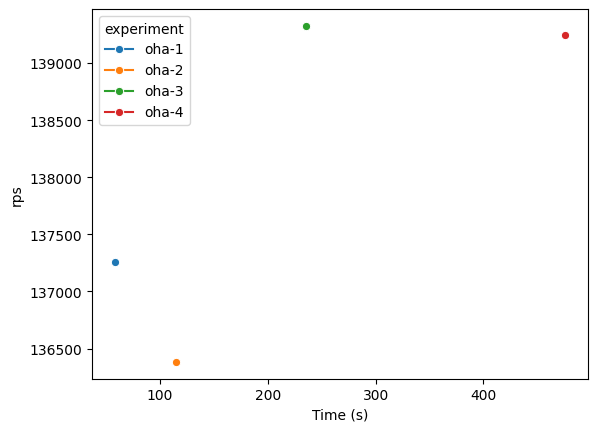

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rps_vs_time(experiments_df: pd.DataFrame):
    df_grouped = experiments_df.groupby('experiment').agg({'rps': 'max', 'Time (s)': 'max'}).reset_index()
    print(df_grouped)
    sns.lineplot(data=df_grouped, x='Time (s)', y='rps', hue='experiment', marker='o')
    plt.show()

plot_rps_vs_time(results)

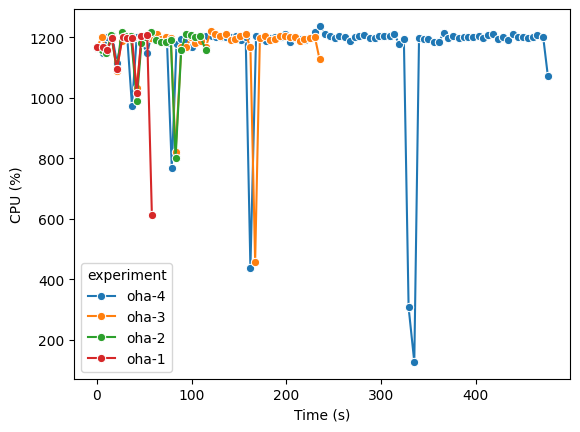